In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD, Adam
from CoinbaseData import CoinbaseDataCollector
from ModelTuning import LSTMModelTuning

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-12-07 00:54:25.309585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#cb_collector = CoinbaseDataCollector()
#btc_frames = cb_collector.get_historical_prices_all_granularities('BTC-USD')

In [3]:
avax = pd.read_csv('data/AVAX-USD_3600_prices.csv')

In [4]:
avax_lstm = LSTMModelTuning(avax)

In [5]:
print(avax_lstm.X_test.shape)
print(avax_lstm.Y_test.shape)
print(avax_lstm.X_train.shape)
print(avax_lstm.Y_train.shape)

(3676, 120, 1)
(3676, 24, 1)
(15138, 120, 1)
(15138, 24, 1)


In [6]:
avax_model, avax_params = avax_lstm.tune_model(epochs=4, max_trials=4, executions_per_trial=1)

Trial 4 Complete [00h 06m 48s]
mse: 0.111122265458107

Best mse So Far: 0.111122265458107
Total elapsed time: 00h 59m 01s
Results summary
Results in tuning/untitled_project
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 3 summary
Hyperparameters:
input_units: 50
dropout: 0.30000000000000004
n_layers: 1
units_0: 50
dropout_0: 0.4
activation: sigmoid
units_1: 500
dropout_1: 0.4
units_2: 100
dropout_2: 0.5
units_3: 100
dropout_3: 0.5
units_last: 450
Score: 0.111122265458107

Trial 2 summary
Hyperparameters:
input_units: 100
dropout: 0.4
n_layers: 4
units_0: 300
dropout_0: 0.30000000000000004
activation: relu
units_1: 300
dropout_1: 0.4
units_2: 350
dropout_2: 0.4
units_3: 50
dropout_3: 0.1
units_last: 50
Score: 0.11118040978908539

Trial 1 summary
Hyperparameters:
input_units: 500
dropout: 0.1
n_layers: 4
units_0: 450
dropout_0: 0.1
activation: tanh
units_1: 50
dropout_1: 0.1
units_2: 50
dropout_2: 0.1
units_3: 50
dropout_3: 0.1
Traceback (most recent call last):
  F

2023-12-07 01:15:51.158790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-07 01:15:51.159811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-07 01:15:51.160560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [7]:
avax_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 120, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 120, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 450)               901800    
                                                                 
 dense (Dense)               (None, 24)                10824     
                                                                 
Total params: 943,224
Trainable params: 943,224
Non-trai

In [9]:
avax_lstm.save(avax_model, 'models/avax_lstm')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 120, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 120, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 450)               901800    
                                                                 
 dense (Dense)               (None, 24)                10824     
                                                                 
Total params: 943,224
Trainable params: 943,224
Non-trai

In [10]:
y_pred = avax_lstm.predict()

2023-12-07 01:42:23.213746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-07 01:42:23.214679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-07 01:42:23.215246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

115/115 [==============================] - 9s 73ms/step


In [14]:
y_pred = pd.DataFrame(y_pred)

In [15]:
y_pred.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,...,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,...,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001,10.660001
std,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
min,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,...,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000
25%,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,...,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000
50%,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,...,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000
75%,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,...,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000
max,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,...,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000,10.660000


<Axes: >

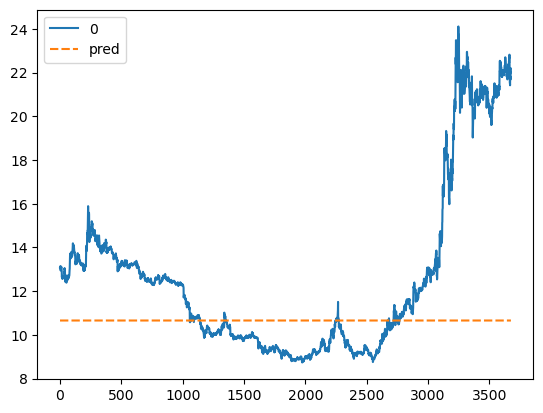

In [24]:
price_df = pd.DataFrame(avax_lstm.scaler.inverse_transform(avax_lstm.Y_test[:, 0]))
price_df['pred'] = y_pred[0]
sns.lineplot(data=price_df, color='blue')

<Axes: >

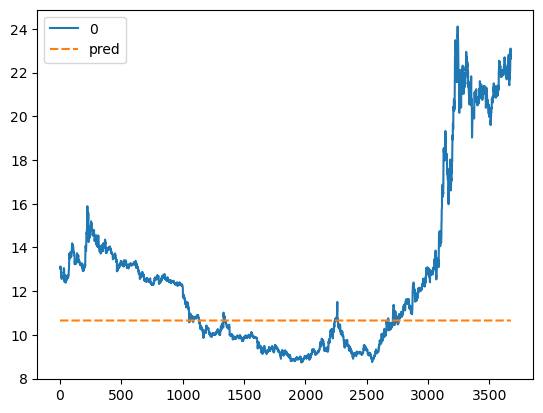

In [25]:
price_df = pd.DataFrame(avax_lstm.scaler.inverse_transform(avax_lstm.Y_test[:, 6]))
price_df['pred'] = y_pred[6]
sns.lineplot(data=price_df, color='blue')

In [42]:
pr = avax_model.predict(avax_lstm.X_test[900].reshape(1, avax_lstm.X_test[0].shape[0], avax_lstm.X_test[0].shape[1]))

1/1 [==============================] - 0s 35ms/step


In [43]:
pr[0][0]

0.0

In [47]:
p = avax_lstm.scaler.inverse_transform(pr)
p

array([[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66,
        10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66,
        10.66, 10.66, 10.66, 10.66, 10.66, 10.66]], dtype=float32)